In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

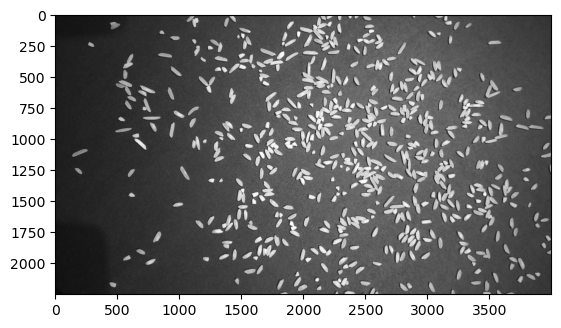

In [88]:
image = cv2.imread('image_1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

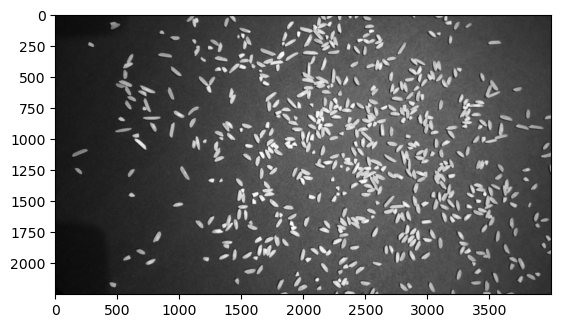

In [3]:
blur = cv2.GaussianBlur(gray, (11, 11), 0)
plt.imshow(blur, cmap='gray')

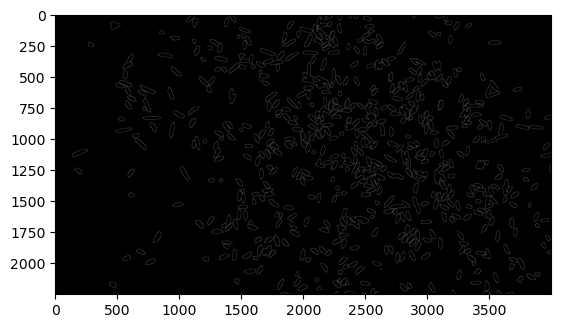

In [4]:
canny = cv2.Canny(blur, 40, 150, 3)
plt.imshow(canny, cmap='gray')

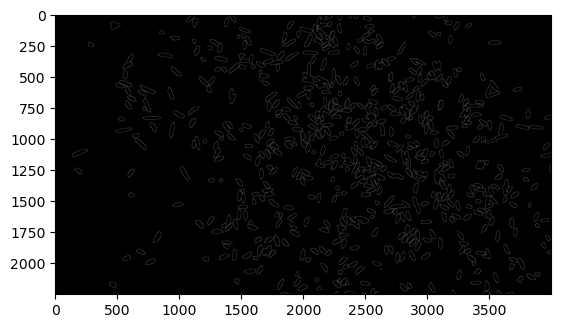

In [5]:
dilated = cv2.dilate(canny, (1, 1), iterations=0)
plt.imshow(dilated, cmap='gray')

# Applying drawCountours method to get the count of proper size of rice grains

Number of detected contours 1006


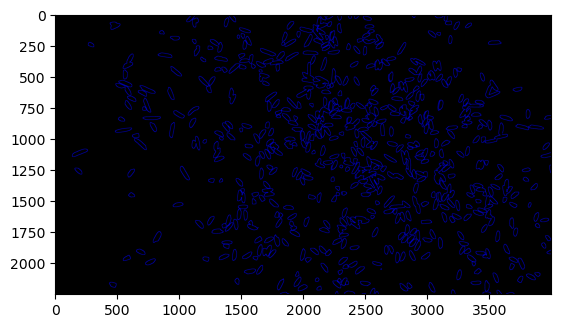

In [154]:

contours, hierarchy = cv2.findContours(dilated.copy(), 
                                      cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


output_contour = cv2.cvtColor(dilated.copy(), cv2.COLOR_GRAY2BGR)
rgb=cv2.drawContours(output_contour, contours, -1, (0, 0, 255), 2)
print("Number of detected contours", len(contours))
plt.imshow(rgb)

#   Applying WaterShed method to get the count all type of rice grains

In [107]:
from PIL import Image 
from numpy import asarray 
import matplotlib.image as mpimg
from scipy import ndimage
from skimage import filters, feature, measure, color
from skimage.segmentation import watershed

In [124]:
dist_trans = ndimage.distance_transform_edt(dilated)

In [125]:
local_max = feature.peak_local_max(dist_trans, min_distance=23)

In [126]:
local_max_mask = np.zeros(dist_trans.shape, dtype=bool)
local_max_mask[tuple(local_max.T)] = True

In [127]:
labels = watershed(-dist_trans, measure.label(local_max_mask), mask=dilated)

Number of Rice grains are : 2471


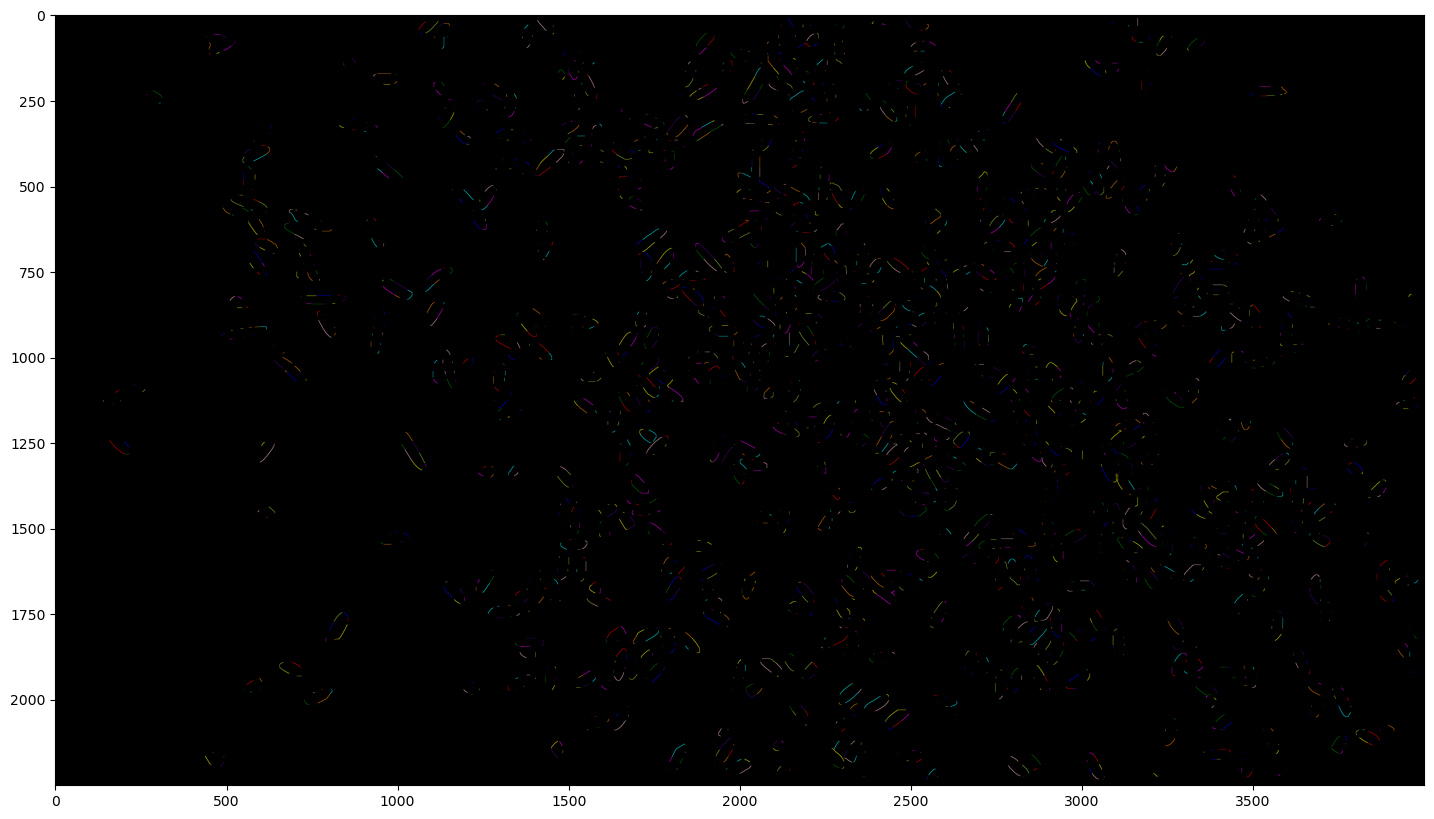

In [129]:
plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(labels , bg_label=0))
print("Number of Rice grains are : %d" % labels.max())